<a href="https://colab.research.google.com/github/jafar-albadarneh/data-science-pot/blob/master/Classification_using_tensorflow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification : (Flowers Dataset)
### The dataset has 3 different classes:
- Setosa
- Verginica
- Versicolor

### Each instance has 4 attributes:
- speal length
- speal width
- petal length
- petal width


In [0]:
!pip install -q sklearn
!pip install -q seaborn
%tensorflow_version 2.x

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc
from IPython.display import clear_output


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
COL_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Verginica']
train_set = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv", names=COL_NAMES, header=0)
test_set = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv", names=COL_NAMES, header=0)
train_y = train_set.pop('Species')
test_y = test_set.pop('Species')

print(train_set.head())
print(train_set.shape)
print(train_set.describe())

   SepalLength  SepalWidth  PetalLength  PetalWidth
0          6.4         2.8          5.6         2.2
1          5.0         2.3          3.3         1.0
2          4.9         2.5          4.5         1.7
3          4.9         3.1          1.5         0.1
4          5.7         3.8          1.7         0.3
(120, 4)
       SepalLength  SepalWidth  PetalLength  PetalWidth
count   120.000000  120.000000   120.000000  120.000000
mean      5.845000    3.065000     3.739167    1.196667
std       0.868578    0.427156     1.822100    0.782039
min       4.400000    2.000000     1.000000    0.100000
25%       5.075000    2.800000     1.500000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.425000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


## EDA
## Data distribution analysis
----
### Analyzing Petal Length


In [0]:
def ecdf(df):
  """Perpare Empirical Cumulative Ditribution Function Data"""
  x = np.sort(df.to_numpy())
  num_samples = len(x)
  y = np.arange(1, num_samples+1)/ num_samples
  return x,y

# set SNS as a default plotting style
sns.set()

> ECDF (Petal length)

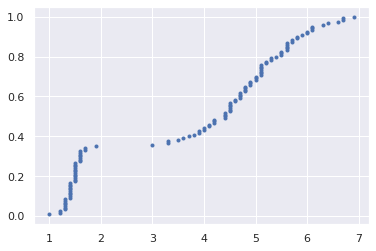

In [6]:
## Calculate ECDF for Petal length
x_pet, y_pet = ecdf(train_set.PetalLength)
plt.plot(x_pet, y_pet, marker='.', linestyle='none')
plt.xlabel('Petal Length')
plt.show()

> Swarm Plot (Petal length)

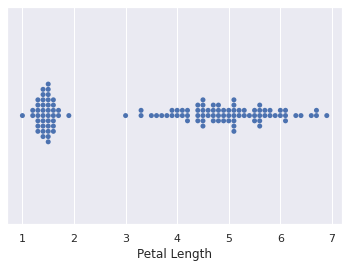

In [13]:
sns.swarmplot(x='PetalLength', data=train_set)
plt.xlabel('Petal Length')
plt.show()

In [7]:
def input_function(features, labels, is_training=True, batch_size=256):
  # generate a tf.Dataset object
  dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
  if is_training:
    dataset = dataset.shuffle(1000).repeat()
  return dataset.batch(batch_size)

feature_columns = []
for feature in train_set.keys():
  feature_columns.append(tf.feature_column.numeric_column(key=feature))

print(feature_columns)


[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


## Classification algorithms
#### Two classifiers will be evaluated on the dataset. Both algorithms are available as ready to use estimators inside tensorflow
- `DNNClassifier`
- `LinearClassifier`

## `DNN Classifier`

In [0]:
# Create the DNN model
dnn_classifier = tf.estimator.DNNClassifier(
    feature_columns = feature_columns,
    # add two hidden layers
    hidden_units=[30,15],
    # the output layer should have a node for each label (class) value
    n_classes=3)

linear_classifier = tf.estimator.LinearClassifier(feature_columns,n_classes=3)
clear_output()

In [9]:
# Train the  DNN model
dnn_classifier.train(
  input_fn= lambda: input_function(train_set, train_y, is_training=True),
  steps=5000)

result = dnn_classifier.evaluate(input_fn= lambda: input_function(test_set, test_y, is_training=False))
clear_output()
print(result['accuracy'])

0.73333335


In [10]:
#Model inference
results = list(dnn_classifier.predict(input_fn= lambda: input_function(test_set, test_y, is_training=False)))
clear_output()
# predection evaluation
print(test_set.loc[0])
print(SPECIES[test_y.loc[0]])
print(results[0]['probabilities'])

SepalLength    5.9
SepalWidth     3.0
PetalLength    4.2
PetalWidth     1.5
Name: 0, dtype: float64
Versicolor
[0.10741946 0.43467525 0.45790523]


# `Linear Classifier`



In [11]:
# Train Linear Classification model
linear_classifier.train(input_fn= lambda: input_function(train_set, train_y, is_training=True), steps=5000)
linear_result = linear_classifier.evaluate(input_fn= lambda: input_function(test_set, test_y, is_training=False))
clear_output()
print(linear_result['accuracy'])

0.96666664


In [12]:
#Model Inference
linear_results = list(linear_classifier.predict(input_fn= lambda: input_function(test_set, test_y, is_training=False)))
clear_output()
# predection evaluation
print(test_set.loc[0])
print(SPECIES[test_y.loc[0]])
print(results[0]['probabilities'])

SepalLength    5.9
SepalWidth     3.0
PetalLength    4.2
PetalWidth     1.5
Name: 0, dtype: float64
Versicolor
[0.10741946 0.43467525 0.45790523]
